# Exploratory Data Analysis - Potato Chips Transactions 

![](https://i.pinimg.com/originals/88/73/77/887377d7f55c1177368b0589d91e4737.jpg)

## Sections

- Imports

- Data Preparation and Cleaning
    - Transactions Data
        - Unique product names
        - Remove salsa products
        - Summary Statistics
        - Daily number of transactions
        - Extracting Brand and Pack Size from PROD_NAME column
    - Customer Data
    - Merged Data - Customer & Transactions
        - Dropping duplicates
        
- Data Exploration and Analysis - Customer Segments
    - Spending by each customer type
    - Deep dive into customer segments
        - Top 5 Brands preferred by Young singles/couples, Mainstream customers
        - Top 5 Brands preferred by Older Families, Budget customers
        - Trend in expenditure by each customer group
        - Highest purchases during Decemeber
    
- Summary & Recommendations

## Imports
Importing necessary python libraries and creating a pandas dataframe for analysis.

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [2]:
customer = pd.read_csv('QVI_purchase_behaviour.csv')          #creating customer dataframe
transactions = pd.read_excel('QVI_transaction_data.xlsx')     #creating transactions dataframe

<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0f0c29, #302b63, #24243e);"> </hr>

## Data Preparation and Cleaning


### Transactions Data

Overview of the transactions data.

In [3]:
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


There seem to be no missing values in the transactions data, however the DATE column is not in the correct data type and needs to be changed to datetime.

In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


There seem to be no missing values in the transactions data, however the DATE column is not in the correct data type and needs to be changed to datetime.

In [5]:
dates = pd.TimedeltaIndex(transactions['DATE'], unit='d') + datetime.datetime(1899,12,30)
transactions.set_index(dates, inplace=True)
transactions.drop('DATE', axis='columns', inplace=True)
transactions.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
DATE,,,,,,,
2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


#### Unique product names

In [6]:
transactions['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

#### Remove salsa products as we are only interested in chips

In [7]:
cond = ~(transactions['PROD_NAME'].str.contains(r'salsa', case=False))
transactions = transactions[cond]

#### Summary statistics

In [8]:
transactions.describe().T

,count,mean,std,min,25%,50%,75%,max
STORE_NBR,246742.0,135.051098,76.787096,1.0,70.00,130.0,203.00,272.0
LYLTY_CARD_NBR,246742.0,135530.984956,80715.280765,1000.0,70015.00,130367.0,203084.00,2373711.0
TXN_ID,246742.0,135131.098848,78147.717692,1.0,67569.25,135183.0,202653.75,2415841.0
PROD_NBR,246742.0,56.351789,33.695428,1.0,26.00,53.0,87.00,114.0
PROD_QTY,246742.0,1.908062,0.659831,1.0,2.00,2.0,2.00,200.0
TOT_SALES,246742.0,7.321322,3.077828,1.7,5.80,7.4,8.80,650.0


#### Daily number of transactions

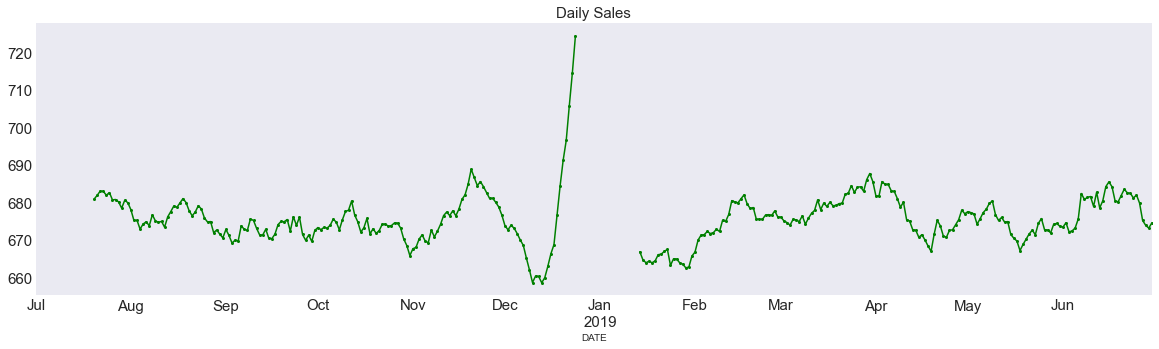

In [9]:
grouped = transactions.groupby([pd.Grouper(freq='D')])['TXN_ID'].count()
grouped = grouped.where(grouped>500, np.nan)
plt.style.use('seaborn-dark')
grouped.rolling(20).mean().plot(figsize=(20,5), style='o-', markersize=2, c='g', fontsize=15)
plt.title('Daily Sales', fontsize=15);

Plotting the moving average of sales we can see that there is an increase in sales during December, sudden drop in sales on one particular day and then the trend returns to normal.

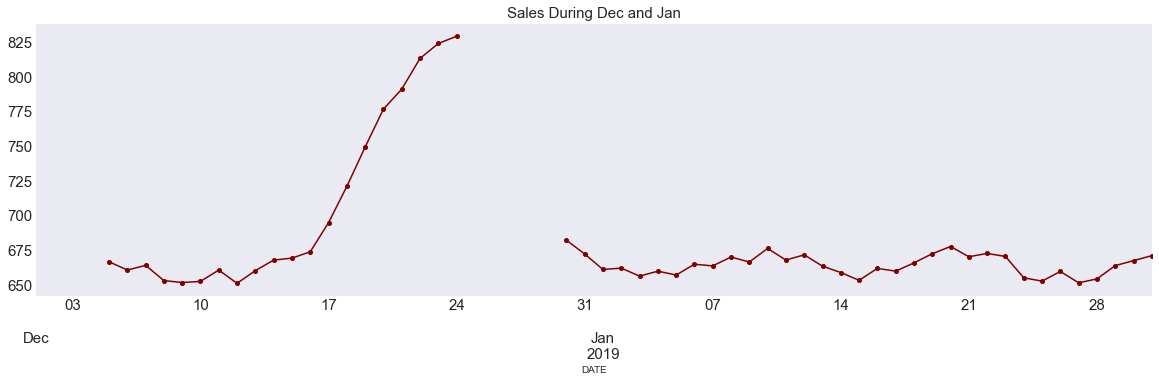

In [10]:
nov_jan = grouped['2018-12-01':'2019-01-31']
nov_jan.rolling(5).mean().plot(figsize=(20,5), style='o-', c='maroon', markersize=4, fontsize=15)
plt.title('Sales During Dec and Jan', fontsize=15);

The zero sales is on Christmas and it now makes sense because stores are closed on Christmas.

In [11]:
grouped[grouped==0]

Series([], Freq: D, Name: TXN_ID, dtype: float64)

#### Extracting Brand and Pack Size from *PROD_NAME* column

In [12]:
transactions['PACK_SIZE'] = transactions['PROD_NAME'].str.extract(r'(\d+)', expand=False).astype(int)
transactions['BRAND'] = transactions['PROD_NAME'].str.extract(r'(\w+)')

In [13]:
np.sort(transactions['BRAND'].unique())

array(['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Dorito',
       'Doritos', 'French', 'Grain', 'GrnWves', 'Infuzions', 'Infzns',
       'Kettle', 'NCC', 'Natural', 'Pringles', 'RRD', 'Red', 'Smith',
       'Smiths', 'Snbts', 'Sunbites', 'Thins', 'Tostitos', 'Twisties',
       'Tyrrells', 'WW', 'Woolworths'], dtype=object)

Some of the brand names are shorter versions of the same brand. These need to be corrected. We can create a helper function to check for such brands and change them accordingly.

In [14]:
def cleaning_brand_name(brand):
    if brand == 'Red':
        return 'RRD'
    elif brand == 'Snbts':
        return 'Sunbites'
    elif brand == 'Infzns':
        return 'Infuzions'
    elif brand == 'WW':
        return 'Woolworths'
    elif brand == 'Smith':
        return 'Smiths'
    elif brand == 'NCC':
        return 'Natural'
    elif brand == 'Dorito':
        return 'Doritos'
    elif brand == 'Grain':
        return 'GrnWves'
    else:
        return brand

transactions['BRAND'] = transactions['BRAND'].apply(cleaning_brand_name)

In [15]:
np.sort(transactions['BRAND'].unique())

array(['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Doritos',
       'French', 'GrnWves', 'Infuzions', 'Kettle', 'Natural', 'Pringles',
       'RRD', 'Smiths', 'Sunbites', 'Thins', 'Tostitos', 'Twisties',
       'Tyrrells', 'Woolworths'], dtype=object)

<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0f0c29, #302b63, #24243e);"> </hr>

### Customer Data

Overview of the customer data.

In [16]:
customer.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


The columns have the correct data types and there are no missing values.

In [17]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


The unique values in the LIFESTAGE and PREMIUM_CUSTOMER column show that there are no anomalies.

In [18]:
print('Unique values in LIFESTAGE: \n{}'.format(customer['LIFESTAGE'].unique()), '\n')
print('Unique values in PREMIUM_CUSTOMER: \n{}'.format(customer['PREMIUM_CUSTOMER'].unique()))

Unique values in LIFESTAGE: 
['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES'] 

Unique values in PREMIUM_CUSTOMER: 
['Premium' 'Mainstream' 'Budget']


<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0f0c29, #302b63, #24243e);"> </hr>

### Merged Data - Customer & Transactions

Merging the customer and transactions data.

In [19]:
merged = pd.merge(transactions.reset_index(), customer, on='LYLTY_CARD_NBR').set_index('DATE')
merged.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
DATE,,,,,,,,,,,
2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget
2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


#### Dropping duplicates

In [20]:
merged.drop_duplicates(inplace=True)

<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0f0c29, #302b63, #24243e);"> </hr>

## Data Exploration and Analysis - Customer Segments

### Spending by each customer type

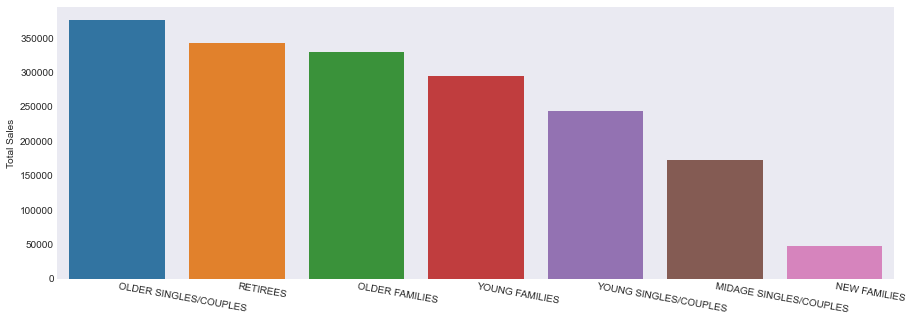

In [21]:
df = merged.groupby('LIFESTAGE').sum()['TOT_SALES'].sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x=df.index, y=df.values)
xticks = plt.xticks(ha='left', rotation=-10)
xlabel = plt.xlabel('')
ylabel = plt.ylabel('Total Sales')

Older customers seem to spend a lot more than younger customers on chips. New families seem to spend considerably less probably because they have children or babies and need to pay more attention to their diet. The barplot suggests that excluding new families, we should target the rest.

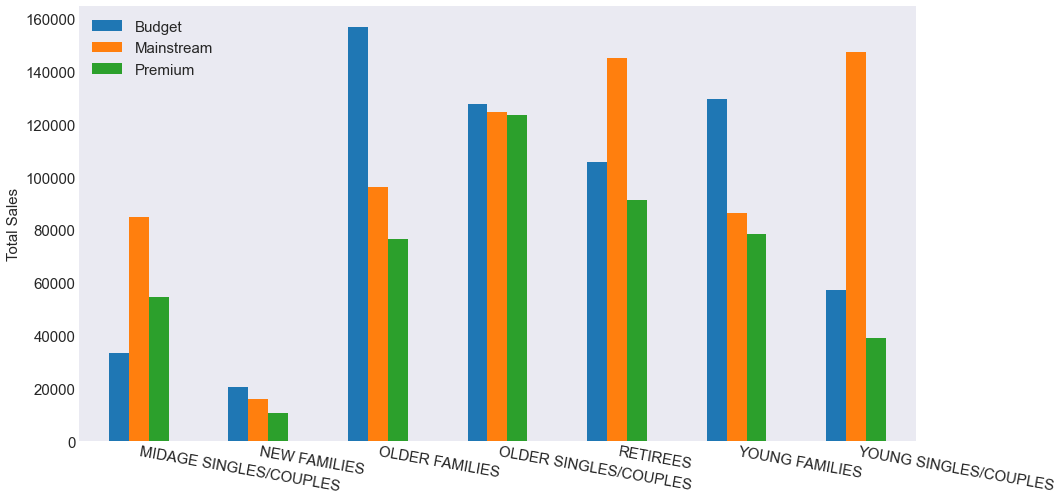

In [22]:
df= merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).sum()['TOT_SALES'].to_frame().unstack()
plt.rcParams.update({'font.size': 15})
plt.style.use('seaborn-dark')
df.plot(kind='bar', figsize=(15,8), fontsize=(15))
xticks = plt.xticks(ha='left', rotation=-10)
plt.legend(labels=['Budget', 'Mainstream', 'Premium'], fontsize='medium')
xlabel = plt.xlabel('')
ylabel = plt.ylabel('Total Sales')

Within each lifestage group we can target the following subgroups: <a id='subgroup_exp'></a>
- MIDAGE SINGLES/COUPLES: Mainstream
- NEW FAMILIES: Budget
- OLDER FAMILIES: Budget
- OLDER SINGLE/COUPLES: Not much variation. So we could target all.
- RETIREES: Mainstream
- YOUNG FAMILIES: Budget
- YOUNG SINGLE/COUPLES: Mainstream

### Deep dive into customer segments

#### Top 5 Brands preferred by Young singles/couples, Mainstream customers

In [23]:
cond = (merged['LIFESTAGE']=='YOUNG SINGLES/COUPLES') & (merged['PREMIUM_CUSTOMER']=='Mainstream')
merged[cond]['BRAND'].value_counts().head()

Kettle       3844
Doritos      2379
Pringles     2315
Smiths       1921
Infuzions    1250
Name: BRAND, dtype: int64

#### Top 5 Brands preferred by Older Families, Budget customers

In [24]:
cond = (merged['LIFESTAGE']=='OLDER FAMILIES') & (merged['PREMIUM_CUSTOMER']=='Budget')
merged[cond]['BRAND'].value_counts().head()

Kettle      3320
Smiths      2948
Doritos     2032
Pringles    1996
RRD         1708
Name: BRAND, dtype: int64

#### Trend in expenditure by each customer group

In [25]:
grouped = merged.groupby([pd.Grouper(freq='d'), 'LIFESTAGE', 'PREMIUM_CUSTOMER'])
df = grouped['TOT_SALES'].sum().to_frame().unstack([1, 2])

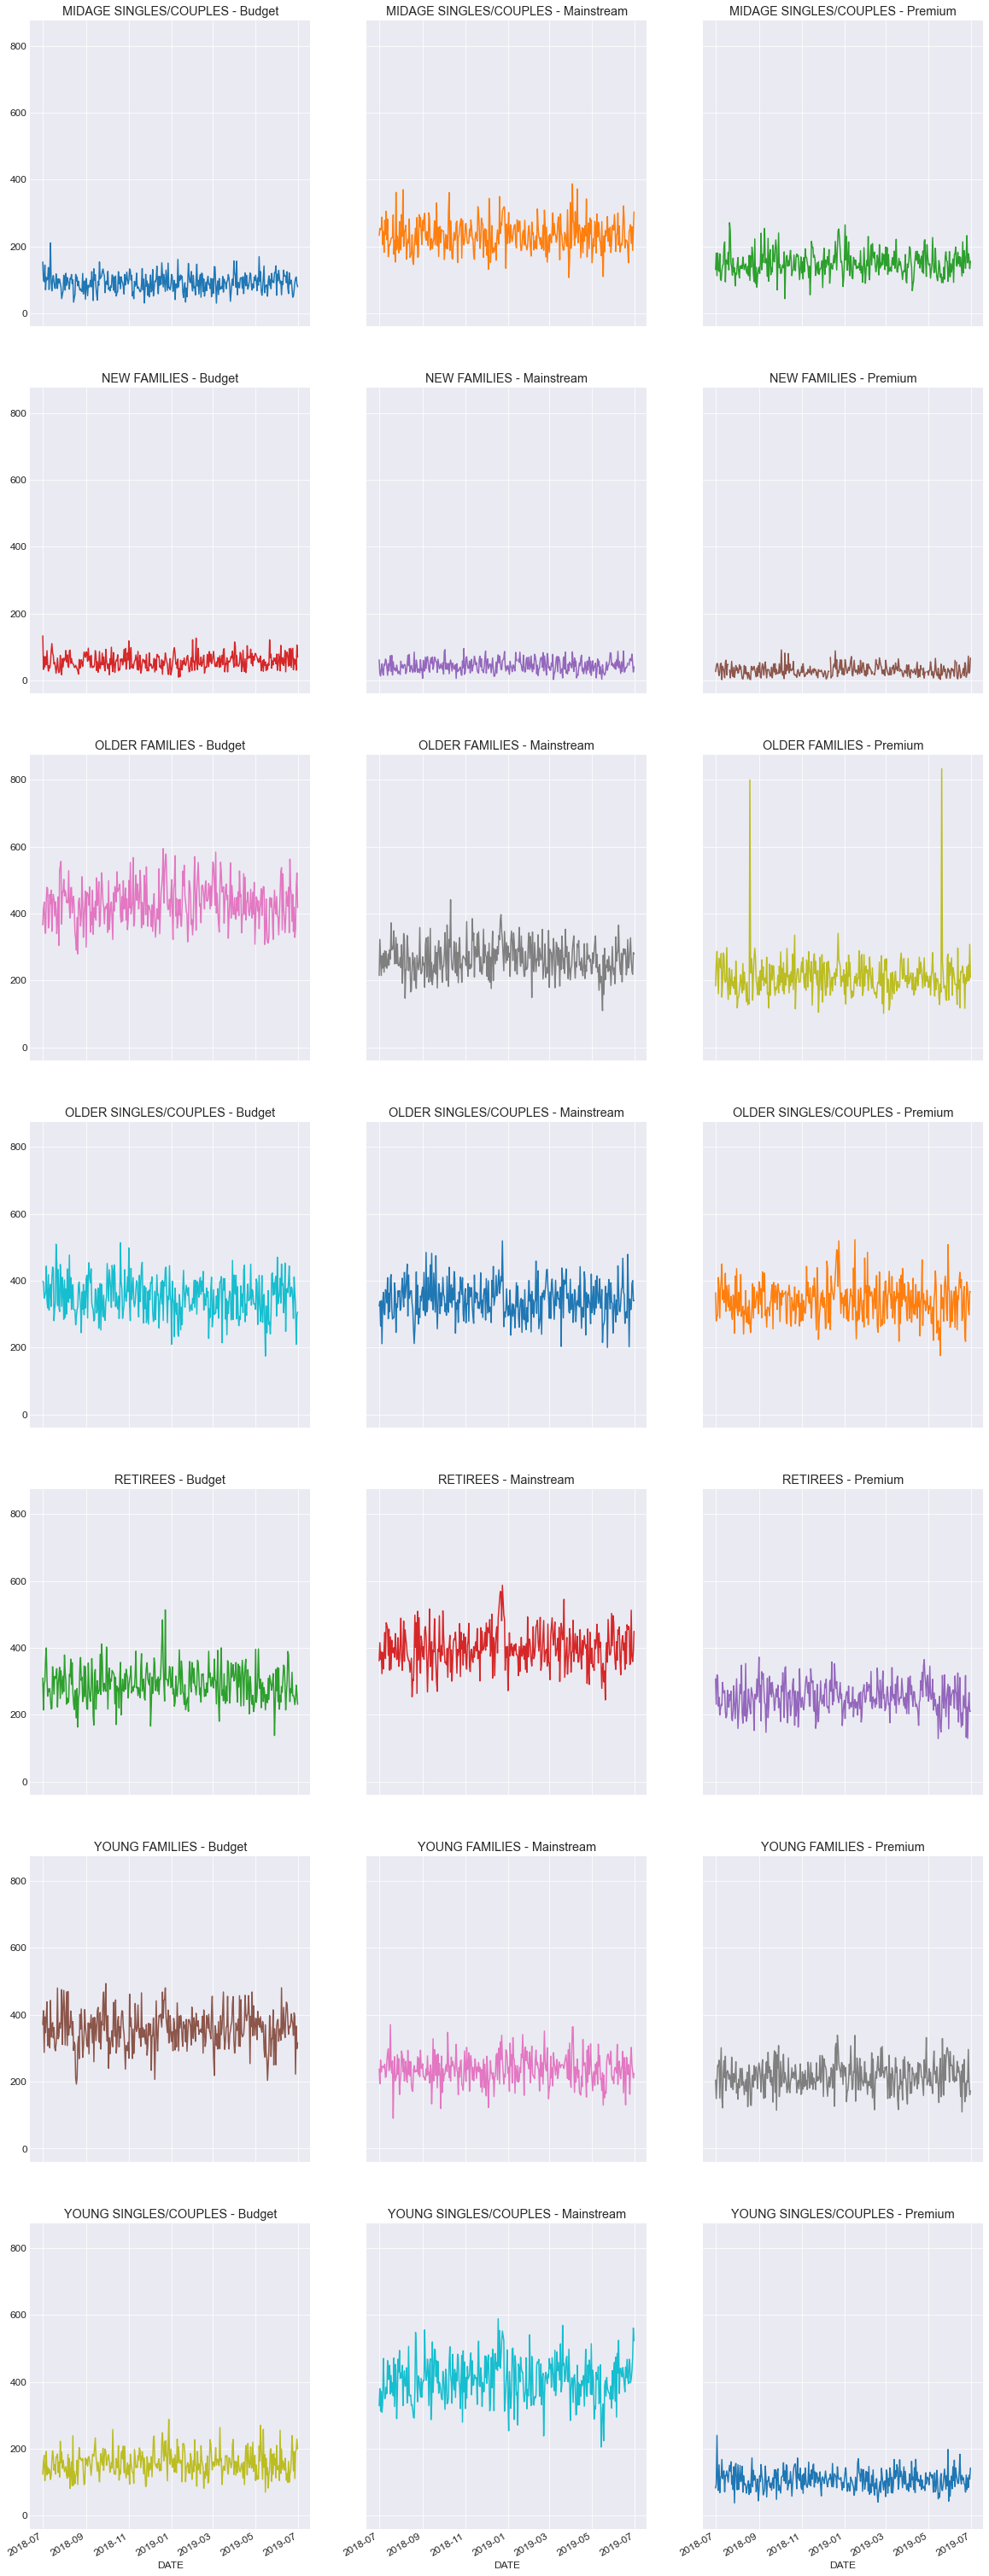

In [26]:
plt.style.use('seaborn-darkgrid')
plt.rcParams.update({'font.size': 12})
title = [' - '.join(cols[1:]) for cols in df.columns]
ax = df.plot(subplots=True,layout=(7,3), figsize=(20, 60), sharey=True, grid=True, title=title, legend=False)

The spending range for all family subgroups is about the same over time, except for OLDER FAMILIES - Premium. There are two huge spikes in OLDER FAMILIES - Premium that are over 700 dollars. This needs to be further looked into.

In [27]:
df[df>700].dropna(axis='rows', how='all').dropna(axis='columns', how='all')

,TOT_SALES
LIFESTAGE,OLDER FAMILIES
PREMIUM_CUSTOMER,Premium
DATE,
2018-08-19,799.9
2019-05-20,833.6


Filtering the dataframe for sales over 700 shows that OLDER FAMILIES - Premium have spent during Christmas 2018 and on [Vietnam War Veterans Day, 2019](https://www.wincalendar.com/Holiday-Calendar/March-2019)

In [28]:
grouped = merged.groupby([pd.Grouper(freq='d'), 'LIFESTAGE', 'PREMIUM_CUSTOMER', 'LYLTY_CARD_NBR'])
df1 = grouped['PROD_QTY', 'TOT_SALES'].sum()
df1[df1>100].dropna()

,,,,PROD_QTY,TOT_SALES
DATE,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR,,
2018-08-19,OLDER FAMILIES,Premium,226000,200.0,650.0
2019-05-20,OLDER FAMILIES,Premium,226000,200.0,650.0


Further inspection shows that only one particular customer with LYLTY_CARD_NBR - 226000 caused the sales spike on Christmas and Veterans day. We could probably target this customer on these two dates in the coming year to generate even more sales by providing exclusive offers for them [](#subgroup_exp)

#### Highest purchases during Decemeber

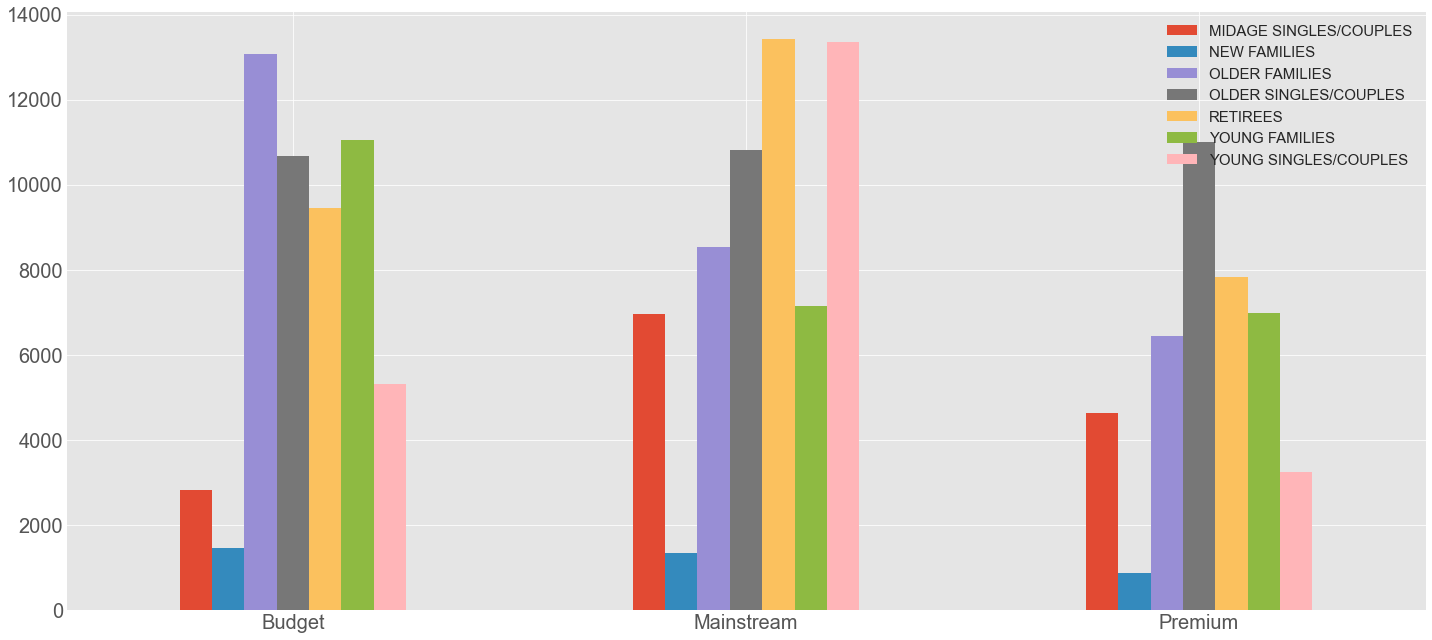

In [29]:
plt.style.use('ggplot')
df = merged.loc['2018-12'].groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['TOT_SALES'].sum()
df.unstack().plot(kind='bar', figsize=(20,9), fontsize=20, rot='horizontal')
plt.legend(fontsize=15)
plt.xlabel('')
plt.tight_layout();

We earlier saw that sales during december increases. The plot above shows the customer segements with highest purchases during december. Within Budget group Older Families, within Mainstream group Retirees and Young singles/couples and within Premium group Older singles/couples account for the highest purchases during december. 

<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0f0c29, #302b63, #24243e);"> </hr>

## Summary & Recommendations

From the brief of analysis of the potato chips transactions we saw that older families spend more on chips. Within these family groups there are three subgroups - budget, mainstream and premium with varying expenditure in chips. We can target each subgroup on a case by case basis as shown in the plot above.

The top brand among customers with highest total sales is Kettle. We should probably focus more on this Kettle and other brands with similar sales number.

We saw that customer with LYLTY_CARD_NBR - 226000 spend way more than other customers on holidays. We could provide exclusive offers to this customer via email or text during holidays. This customer might then bring in more such customers.

During december specific customer segments contribute to the highest sales as shown above, we can again focus on these customers to generate more sales.
<br></br>
<br></br>